In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()


for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path+ '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error in loading image")

data = np.array(data)
labels = np.array(labels)

In [17]:
print(data.shape, labels.shape)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, random_state =42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [18]:
model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (5,5), activation= 'relu', input_shape = x_train.shape[1:]),
    layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(rate = .5),
    layers.Dense(43, activation = 'softmax') 
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']   
)

In [21]:
history = model.fit(
    x_train, y_train, batch_size = 64, epochs = 20, validation_data = (x_test, y_test)
)

Epoch 1/20
491/491 [==============================] - 74s 149ms/step - loss: 2.9015 - accuracy: 0.2972 - val_loss: 1.0611 - val_accuracy: 0.7399
Epoch 2/20
491/491 [==============================] - 74s 152ms/step - loss: 1.1659 - accuracy: 0.6716 - val_loss: 0.4580 - val_accuracy: 0.8865
Epoch 3/20
491/491 [==============================] - 68s 139ms/step - loss: 0.7321 - accuracy: 0.7868 - val_loss: 0.2692 - val_accuracy: 0.9258
Epoch 4/20
491/491 [==============================] - 75s 152ms/step - loss: 0.5451 - accuracy: 0.8393 - val_loss: 0.1912 - val_accuracy: 0.9444
Epoch 5/20
491/491 [==============================] - 79s 162ms/step - loss: 0.4423 - accuracy: 0.8689 - val_loss: 0.2807 - val_accuracy: 0.9128
Epoch 6/20
491/491 [==============================] - 68s 139ms/step - loss: 0.3973 - accuracy: 0.8834 - val_loss: 0.1277 - val_accuracy: 0.9674
Epoch 7/20
491/491 [==============================] - 78s 159ms/step - loss: 0.3267 - accuracy: 0.9009 - val_loss: 0.0976 - val_ac

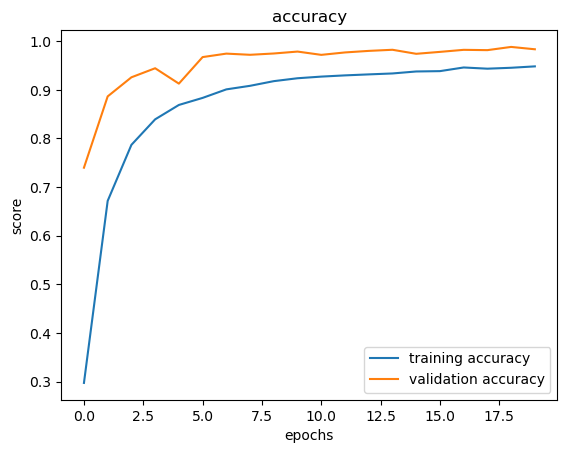

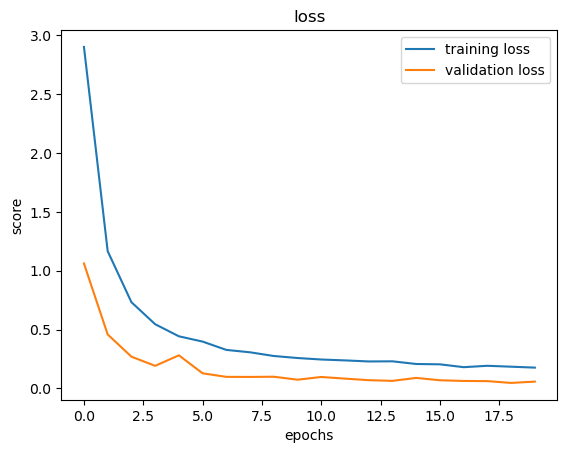

In [29]:
plt.figure(0) 
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('score')
plt.legend()
plt.show()

plt.figure(1) 
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('score')
plt.legend()
plt.show()

# plt.subplot(1,2,2)
# plt.figure(0)
# plt.plot(img,(1,2,1))
# plt.xlabel('epochs')
# plt.ylabel('score')


In [30]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test['ClassId'].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image  = image.resize((30,30))
    data.append(np.array(image))
    
x_test = np.array(data)

pred_probs  = model.predict(x_test)
pred = np.argmax(pred_probs, axis=1)

accuracy_score(labels,pred)

395/395 [==============================] - 7s 18ms/step


0.9536817102137767

In [31]:


model.save('traffic_signal.hdf5')


